YouTube Trending Videos Analysis


In [1]:
import pandas as pd
import numpy as np

In [5]:
# Load the US dataset
df = pd.read_csv('USvideos.csv', on_bad_lines='skip')
# Load random 15,000 rows from the dataset
df = df.sample(n=15000, random_state=42).reset_index(drop=True)
print(df.shape)

(15000, 16)


/tmp/ipython-input-4192513614.py:2: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('USvideos.csv', on_bad_lines='skip')


In [6]:
# View first 5 rows
print(df.head())

      video_id trending_date  \
0  5jmaUAvUou4      18.21.04   
1  tgHnvbYlW2k      18.06.01   
2  Y_VQkw9MJA4      18.20.01   
3  -WRcZ9xHMuE      18.26.02   
4  UUkn-enk2RU      18.24.05   

                                               title  \
0  Lily Marston’s Cozy, Gray-Toned Living & Dinin...   
1  Guinness World Record For World’s Largest Aeri...   
2  Dakota Fanning dishes on new psychological thr...   
3                         Samsung Galaxy S9 hands-on   
4  Marvel Studios' Ant-Man and The Wasp - Officia...   

                          channel_title  category_id  \
0                              Mr. Kate           26   
1  Red Robot - Intelligent Distribution           19   
2                  Good Morning America           24   
3                             The Verge           28   
4                  Marvel Entertainment           24   

               publish_time  \
0  2018-04-05T22:00:01.000Z   
1  2017-12-31T23:40:51.000Z   
2  2018-01-16T15:47:44.000Z   
3  2018-0

In [7]:
# Column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                15000 non-null  object 
 1   trending_date           15000 non-null  object 
 2   title                   15000 non-null  object 
 3   channel_title           15000 non-null  object 
 4   category_id             15000 non-null  int64  
 5   publish_time            15000 non-null  object 
 6   tags                    15000 non-null  object 
 7   views                   15000 non-null  float64
 8   likes                   15000 non-null  float64
 9   dislikes                15000 non-null  float64
 10  comment_count           15000 non-null  float64
 11  thumbnail_link          15000 non-null  object 
 12  comments_disabled       15000 non-null  object 
 13  ratings_disabled        15000 non-null  object 
 14  video_error_or_removed  15000 non-null

In [8]:
# Check missing values
print(df.isnull().sum())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               207
dtype: int64


In [9]:
# Convert trending_date (YY.DD.MM) to proper datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [10]:
# Check how it worked
print(df['trending_date'].dtype)
print(df['publish_time'].dtype)

datetime64[ns]
datetime64[ns]


In [11]:
print(df[['trending_date', 'publish_time']].head())

  trending_date        publish_time
0    2018-04-21 2018-04-05 22:00:01
1    2018-01-06 2017-12-31 23:40:51
2    2018-01-20 2018-01-16 15:47:44
3    2018-02-26 2018-02-25 17:00:01
4    2018-05-24 2018-05-01 14:02:27


In [12]:
# Clean the tags column by removing pipe "|" and strip extra spaces
df['tags'] = df['tags'].str.replace('|', ', ', regex=False)

# Replace "[none]" with empty string
df['tags'] = df['tags'].replace('[none]', '', regex=False)

In [13]:
# Numeric columns
print(df[['views', 'likes', 'dislikes', 'comment_count']].describe())

              views         likes      dislikes  comment_count
count  1.500000e+04  1.500000e+04  1.500000e+04   1.500000e+04
mean   2.331737e+06  7.316237e+04  3.750910e+03   8.388989e+03
std    7.260831e+06  2.248981e+05  3.109340e+04   3.735476e+04
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    2.439180e+05  5.403750e+03  2.030000e+02   6.137500e+02
50%    6.643435e+05  1.809000e+04  6.200000e+02   1.844500e+03
75%    1.797811e+06  5.409675e+04  1.891000e+03   5.700250e+03
max    2.252119e+08  5.613827e+06  1.643059e+06   1.321281e+06


In [14]:
# A description column
print(f"Number of Descriptions Missing: {df['description'].isnull().sum()}")

Number of Descriptions Missing: 207


In [15]:
# Fill missing descriptions with empty string
df['description'] = df['description'].fillna('')

In [16]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                15000 non-null  object        
 1   trending_date           15000 non-null  datetime64[ns]
 2   title                   15000 non-null  object        
 3   channel_title           15000 non-null  object        
 4   category_id             15000 non-null  int64         
 5   publish_time            15000 non-null  datetime64[ns]
 6   tags                    15000 non-null  object        
 7   views                   15000 non-null  float64       
 8   likes                   15000 non-null  float64       
 9   dislikes                15000 non-null  float64       
 10  comment_count           15000 non-null  float64       
 11  thumbnail_link          15000 non-null  object        
 12  comments_disabled       15000 non-null  object

In [17]:
# Check missing values
print(df.isnull().sum())

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


In [18]:
# Show summary statistics for the main numeric columns
df[['views', 'likes', 'dislikes', 'comment_count']].describe()

,views,likes,dislikes,comment_count
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,2.331737e+06,7.316237e+04,3.750910e+03,8.388989e+03
std,7.260831e+06,2.248981e+05,3.109340e+04,3.735476e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.439180e+05,5.403750e+03,2.030000e+02,6.137500e+02
50%,6.643435e+05,1.809000e+04,6.200000e+02,1.844500e+03
75%,1.797811e+06,5.409675e+04,1.891000e+03,5.700250e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.321281e+06


In [19]:
# The 99th percentile
print("Views 99th:", df['views'].quantile(0.99))
print("Likes 99th:", df['likes'].quantile(0.99))
print("Dislikes 99th:", df['dislikes'].quantile(0.99))
print("Comments 99th:", df['comment_count'].quantile(0.99))

Views 99th: 29943769.660000004
Likes 99th: 934110.6700000003
Dislikes 99th: 44710.32000000001
Comments 99th: 97504.56000000001


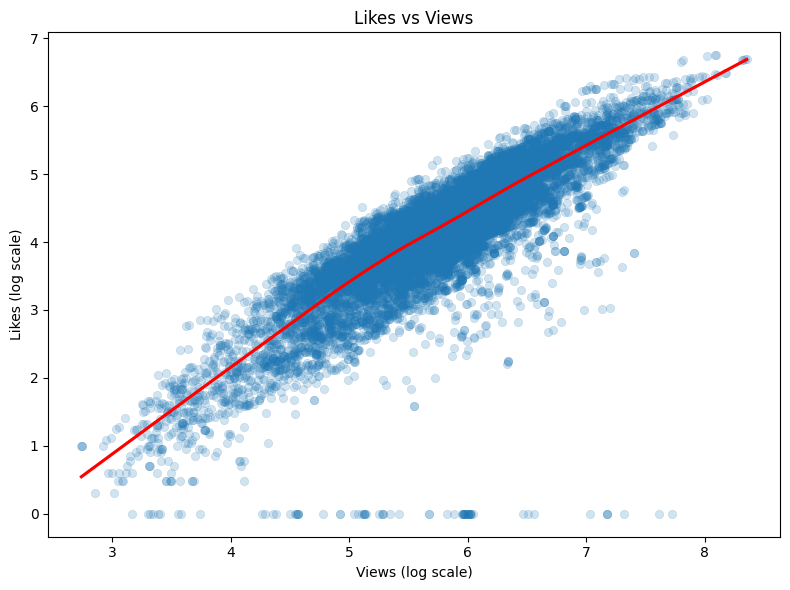

In [20]:
# Scatter Plot of likes vs views
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Avoiding log(0) by adding 1
df_plot = df.copy()
df_plot['log_views'] = np.log10(df_plot['views'] + 1)
df_plot['log_likes'] = np.log10(df_plot['likes'] + 1)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x='log_views', y='log_likes',
                alpha=0.2, edgecolor=None)
sns.regplot(data=df_plot, x='log_views', y='log_likes',
            scatter=False, lowess=True, line_kws={'color':'red'})
plt.xlabel('Views (log scale)')
plt.ylabel('Likes (log scale)')
plt.title('Likes vs Views')
plt.tight_layout()
plt.show()

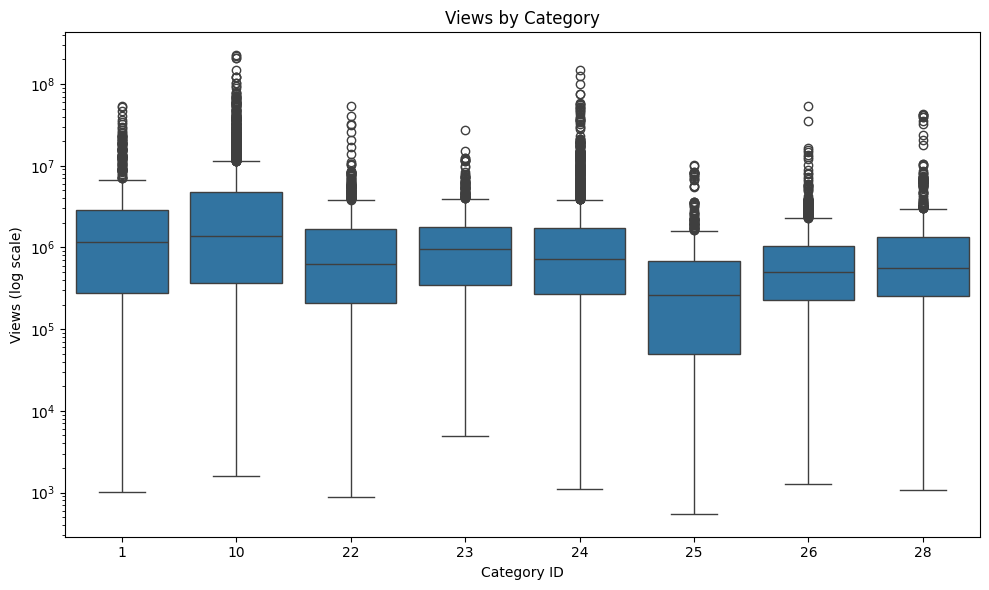

In [21]:
# Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Top 8 categories
top_cats = df['category_id'].value_counts().nlargest(8).index.tolist()
df_box = df[df['category_id'].isin(top_cats)].copy()

plt.figure(figsize=(10,6))
sns.boxplot(data=df_box, x='category_id', y='views')
# log scale helps with the skew
plt.yscale('log')
plt.xlabel('Category ID')
plt.ylabel('Views (log scale)')
plt.title('Views by Category')
plt.tight_layout()
plt.show()

Data Modeling

In [22]:
# Days to trend is my target for regression
df['days_to_trend'] = (df['trending_date'] - df['publish_time']).dt.days

# Remove rows where the value doesn't make sense
df = df[df['days_to_trend'] >= 0]
print(df['days_to_trend'].describe())

count    14966.000000
mean        14.815047
std        137.359807
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max       3563.000000
Name: days_to_trend, dtype: float64


In [23]:
# Encode categorical columns (category_id)
df = pd.get_dummies(df, columns=['category_id'], drop_first=True)

In [24]:
# Select numeric features
features = ['views', 'likes', 'dislikes', 'comment_count']

# Add encoded categories
category_columns = [col for col in df.columns if col.startswith('category_id_')]
features = features + category_columns

X = df[features]
y_reg = df['days_to_trend']

Model 1: Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [27]:
# Create the Linear Regression model
reg_model = LinearRegression()

In [28]:
# Train the data
reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the days_to_trend for the test set
y_pred = reg_model.predict(X_test)

In [30]:
# Calculate evaluation metrics
# MAE shows the average error in days & R2 shows how the model explains the variation in the data
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2:", r2)

MAE: 19.902726185102352
R2: 0.0012510503539678863


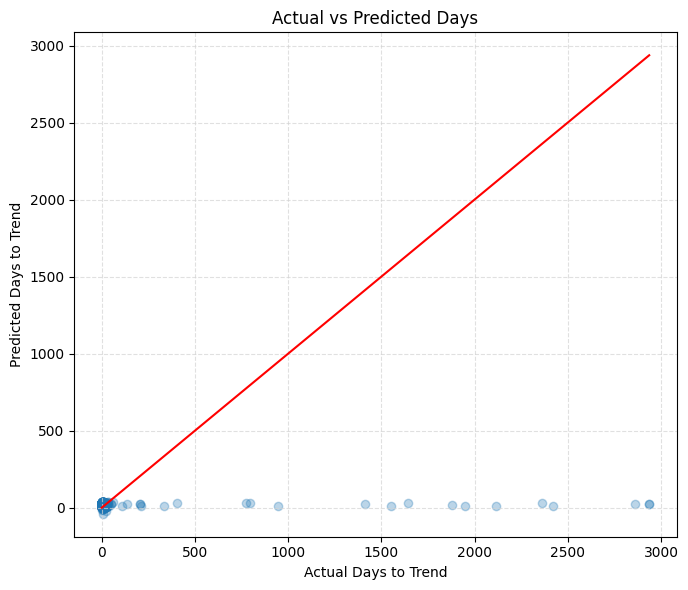

In [31]:
# Predicted vs Actual Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Days to Trend")
plt.ylabel("Predicted Days to Trend")
plt.title("Actual vs Predicted Days")
plt.grid(True, linestyle='--', color='lightgrey', alpha=0.7)
plt.tight_layout()
plt.show()

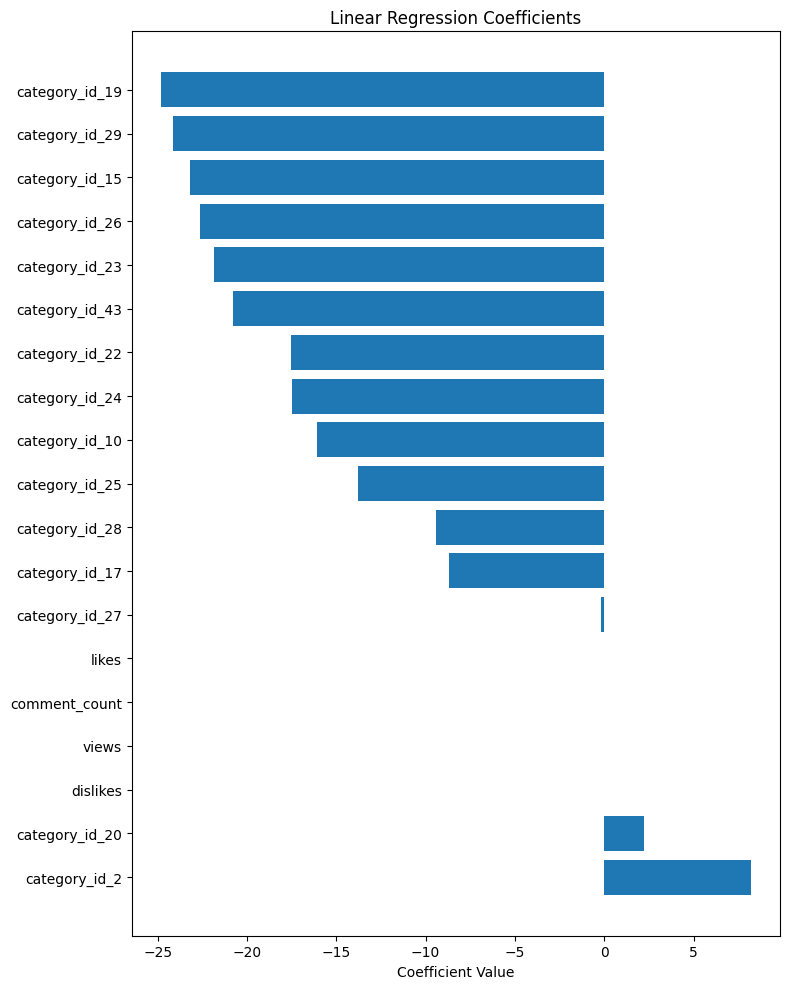

In [32]:
# Bar Chart of Regression Coefficients
import pandas as pd
import matplotlib.pyplot as plt

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg_model.coef_
    }).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,10))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()

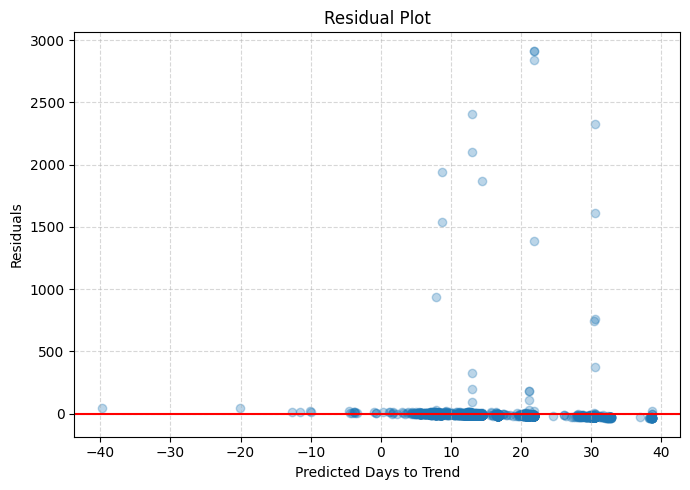

In [33]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red')
plt.xlabel("Predicted Days to Trend")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Model 2: Random Forest Classification

In [34]:
# Binary label
df['will_trend'] = df['days_to_trend'].apply(lambda x: 1 if x <= 7 else 0)

# Target variable
y_clf = df['will_trend']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [35]:
# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Predict
preds = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("F1:", f1_score(y_test, preds))

Accuracy: 0.8841015364061456
F1: 0.9260915867944622


<Figure size 600x500 with 0 Axes>

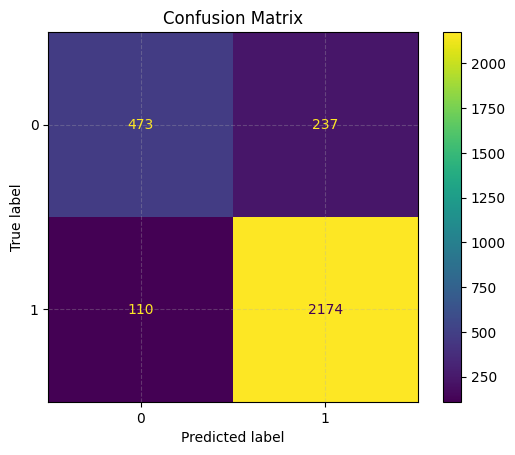

In [37]:
# Confusion Matrix Random Forest Classifier Visualization
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

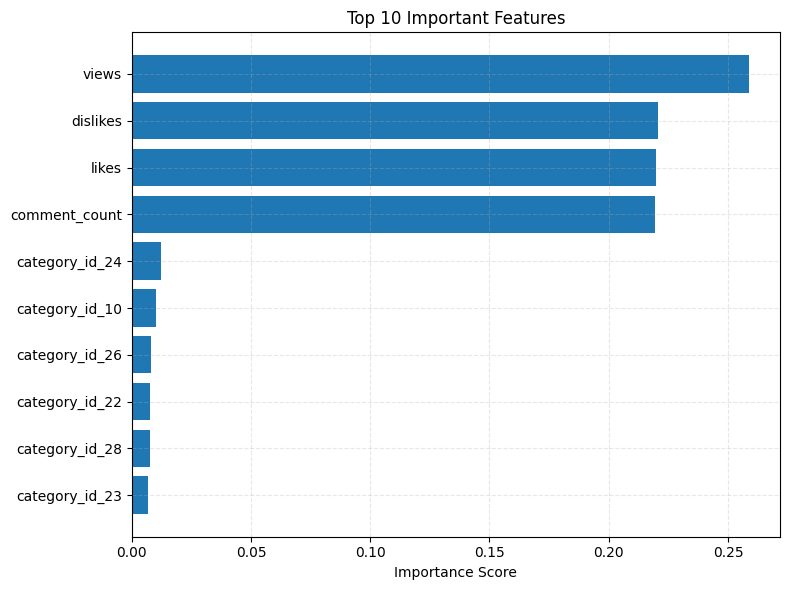

In [38]:
# Top 10 Important Features Random Forest Classifier Visualization
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Importance Score")
plt.title("Top 10 Important Features")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Model 3: K-Means Clustering

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numeric engagement features
cluster_data = df[['views', 'likes', 'dislikes', 'comment_count']]

# Scale data for better clustering
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_data)

In [40]:
# Build KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

df[['views', 'likes', 'cluster']].head()

,views,likes,cluster
0,873750.0,45919.0,0
1,106998.0,284.0,0
2,2917.0,29.0,0
3,643051.0,7736.0,0
4,19780012.0,445716.0,0


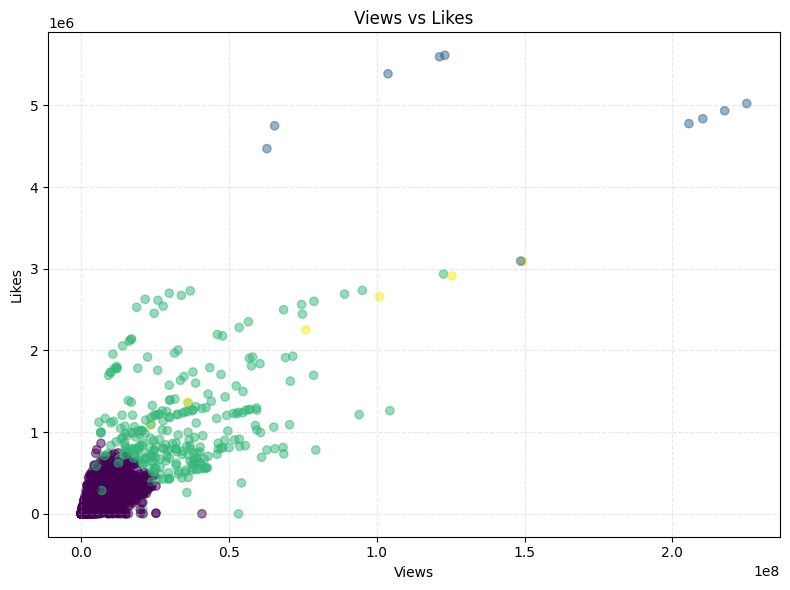

In [41]:
# Scatterplot Visualization
plt.figure(figsize=(8,6))
plt.scatter(df['views'], df['likes'], c=df['cluster'], alpha=0.5)
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Views vs Likes")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

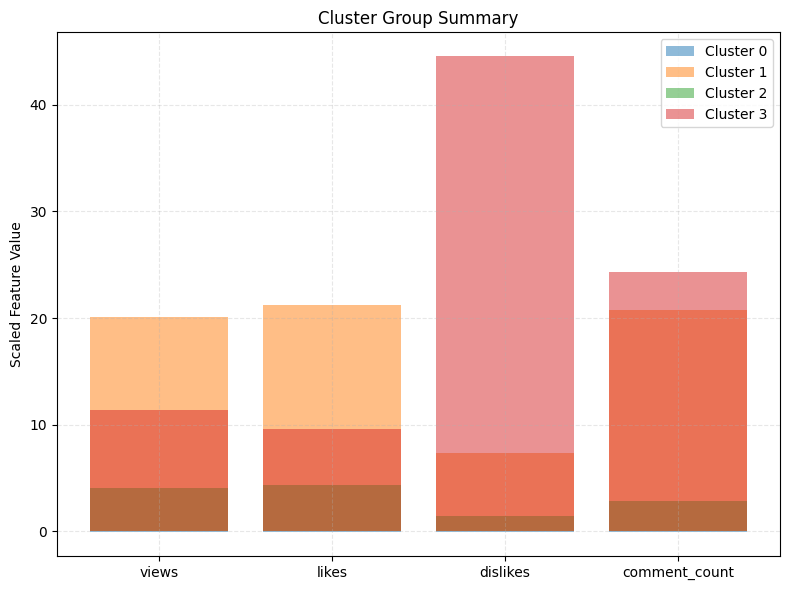

In [42]:
# Bar Chart
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
for i in range(4):
  plt.bar(['views','likes','dislikes','comment_count'], cluster_centers[i], alpha=0.5, label=f'Cluster {i}')

plt.title("Cluster Group Summary")
plt.ylabel("Scaled Feature Value")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
df = pd.read_csv('USvideos.csv')

In [45]:
# To figure out what categories are in my 15,000 chosen dataset
import json

with open('US_category_id.json', 'r') as f:
  cat_data = json.load(f)

cat_map = {int(item['id']): item['snippet']['title'] for item in cat_data['items']}

In [46]:
df['category_name'] = df['category_id'].map(cat_map)

In [47]:
df[['category_id', 'category_name']].head()

,category_id,category_name
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment


In [48]:
# Print all category names in the dataset
print(df['category_name'])

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40949, dtype: object


In [49]:
# Finding the category names for the random 15,000 rows I use
subset_categories = df['category_name'].unique()
print(subset_categories)

['People & Blogs' 'Entertainment' 'Comedy' 'Science & Technology'
 'Film & Animation' 'News & Politics' 'Sports' 'Music' 'Pets & Animals'
 'Education' 'Howto & Style' 'Autos & Vehicles' 'Travel & Events' 'Gaming'
 'Nonprofits & Activism' 'Shows']


In [50]:
# Count how many videos are in each category
category_counts = df['category_name'].value_counts()

# Print the result
print(category_counts)

category_name
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: count, dtype: int64


In [51]:
import pandas as pd

# Assuming your dataset is 'df' and has these columns
summary_table = df.groupby('category_id')[['views', 'likes', 'dislikes', 'comment_count']].mean().reset_index()

# Rename columns for clarity
summary_table.columns = ['Category', 'Mean Views', 'Mean Likes', 'Mean Dislikes', 'Mean Comments']

# Sort by Mean Views descending
summary_table = summary_table.sort_values(by='Mean Views', ascending=False)

# Display the table
print(summary_table)

    Category    Mean Views     Mean Likes  Mean Dislikes  Mean Comments
2         10  6.201003e+06  218918.199011    7907.757726   19359.764524
0          1  3.106250e+06   70787.836247    2590.681450    7627.744136
14        29  2.963884e+06  259923.614035   58076.859649   84364.859649
6         20  2.620831e+06   84502.183599   11241.696450   18042.488372
9         24  2.067883e+06   53243.325070    4314.297772    7383.229426
4         17  2.025969e+06   45363.942502    2361.339006    5148.185373
7         22  1.531835e+06   58135.825234    3173.800935    7719.013084
8         23  1.480308e+06   62582.223315    2091.521840    6521.718831
13        28  1.452627e+06   34374.276551    1894.378176    4993.721783
1          2  1.355965e+06   11056.395833     632.838542    2042.830729
11        26  9.837301e+05   39286.076942    1320.284370    5583.586589
15        43  9.035273e+05   18993.666667     429.964912    1668.719298
5         19  8.546196e+05   12030.462687     846.833333    2267

In [52]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# The 'viral' column does not exist in the DataFrame.
# Based on previous modeling steps, the intended target for classification is likely 'will_trend',
# which indicates if a video trended within 7 days.
# To create 'will_trend', we first need to ensure 'trending_date' and 'publish_time' are datetime objects
# and then calculate 'days_to_trend'.
# Note: The 'df' here is currently the full dataset (40949 rows) as reloaded in cell iOBvgBB_dmQk.
# These preprocessing steps are being reapplied to this full dataset.

# Convert trending_date (YY.DD.MM) to proper datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Calculate 'days_to_trend'
df['days_to_trend'] = (df['trending_date'] - df['publish_time']).dt.days

# Filter out rows where days_to_trend is negative (if any, due to data inconsistencies)
df = df[df['days_to_trend'] >= 0].copy() # Using .copy() to avoid SettingWithCopyWarning

# Create the binary target variable 'will_trend'
df['will_trend'] = df['days_to_trend'].apply(lambda x: 1 if x <= 7 else 0)


# Example: define your features (X) and target (y)
X = df[['views', 'likes', 'dislikes', 'comment_count']]
y = df['will_trend']  # Changed 'viral' to the newly created 'will_trend' column

# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Create feature importance table
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature  Importance
0          views    0.267708
1          likes    0.256889
3  comment_count    0.240738
2       dislikes    0.234666
